In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
#import the data, specify data types
import pandas as pd

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [58]:
df = pd.read_csv('../input/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [60]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [59]:
df = df.drop('Description', axis = 1)

In [61]:
df.dtypes

InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [62]:
non_cat = [f for f in df.columns if df.dtypes[f] != 'object']
cat = [f for f in df.columns if df.dtypes[f] == 'object']

In [ ]:
cat

In [63]:
non_cat.remove('InvoiceDate')
cat.append('InvoiceDate')

In [64]:
def treat_missing_numeric(df,columns,how = 'mean'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mean', 'mode', 'median','ffill', numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mean':
        for i in columns:
            print("Filling missing values with mean for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mean())
            
    elif how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode())
    
    elif how == 'median':
        for i in columns:
            print("Filling missing values with median for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].median())
    
    elif how == 'ffill':
        for i in columns:
            print("Filling missing values with forward fill for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(method ='ffill')
    
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    else:
        print("Missing value fill cannot be completed")
    return df

In [65]:
def treat_missing_categorical(df,columns,how = 'mode'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mode', any string or numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode()[0])
    elif type(how) == str:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(str(how))
    else:
        print("Missing value fill cannot be completed")
    return df

In [66]:
treat_missing_numeric(df,non_cat,how = 'mean')

Filling missing values with mean for columns - Quantity
Filling missing values with mean for columns - UnitPrice


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [67]:
treat_missing_categorical(df,cat,how = 'mode')

Filling missing values with mode for columns - InvoiceNo
Filling missing values with mode for columns - StockCode
Filling missing values with mode for columns - CustomerID
Filling missing values with mode for columns - Country


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Filling missing values with mode for columns - InvoiceDate


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [68]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[non_cat])
df[non_cat] = std_scale.transform(df[non_cat])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [69]:
countries = ['Germany','France']
df_l = df[df.Country.isin(countries)]
df_l.shape 

(18052, 7)

In [73]:
df_l.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,0.066249,2010-12-01 08:45:00,-0.008900,12583,1
27,536370,22727,0.066249,2010-12-01 08:45:00,-0.008900,12583,1
28,536370,22726,0.011224,2010-12-01 08:45:00,-0.008900,12583,1
29,536370,21724,0.011224,2010-12-01 08:45:00,-0.038871,12583,1
30,536370,21883,0.066249,2010-12-01 08:45:00,-0.040938,12583,1


In [72]:
df_l.loc[ df_l.Country == 'Germany', 'Country'] = 0
df_l.loc[ df_l.Country == 'France', 'Country'] = 1

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [75]:
cat.remove('Country')

In [77]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

for col in cat:
    df_l[col]=labelEnc.fit_transform(df_l[col])
    

df_l.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,0,1050,0.066249,0,-0.008900,67,1
27,0,1049,0.066249,0,-0.008900,67,1
28,0,1048,0.011224,0,-0.008900,67,1
29,0,414,0.011224,0,-0.038871,67,1
30,0,467,0.066249,0,-0.040938,67,1


In [78]:
X = df_l.copy()
X = X.drop('Country', axis = 1)
y = df_l['Country']

In [79]:
def holdout_cv(X,y,size = 0.3, seed = 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = seed)
    return X_train, X_test, y_train, y_test

In [80]:
X_train, X_test, y_train, y_test = holdout_cv(X, y, size = 0.3, seed = 1)

In [81]:
'''See the dimensions of input and output data set.'''
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

Input Matrix Dimension:   (12636, 6)
Output Vector Dimension:  (12636,)
Test Data Dimension:      (5416, 6)


In [84]:
from sklearn.svm import SVC

In [85]:
### Running SVM
def runSVC(train_X, train_y, test_X, test_y, C=1.0, kernel_choice = 'rbf'):
    model = SVC(C=C, kernel=kernel_choice, probability=True)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, model

In [86]:
pred_svm , loss_svm, model_svm = runSVC(X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train and Test loss :  1.0 0.908925272690009


In [89]:
pred_svm

array([0., 0., 1., ..., 0., 0., 0.])

In [88]:
for i in range(len(pred_svm)):
    if pred_svm[i] >= 0.5:
       pred_svm[i] = 1
    else:
        pred_svm[i] = 0

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
#pred_test_y_xg
accuracy_score(y_test, pred_svm)

0.7520310192023634

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
### Running Decision Tree
def runDT(train_X, train_y, test_X, test_y, criterion='gini', depth=None, min_split=2, min_leaf=1):
    model = DecisionTreeClassifier(criterion = criterion, max_depth = depth, 
                                   min_samples_split = min_split, min_samples_leaf=min_leaf)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, model

In [96]:
test_pred_dt, loss_dt, model_dt = runDT( X_train, y_train, X_test, y_test)

Train and Test loss :  1.0 0.9998008761449622


In [97]:
test_pred_dt

array([0., 0., 1., ..., 1., 0., 0.])

In [98]:
#pred_test_y_xg
accuracy_score(y_test, test_pred_dt)

0.9998153618906942

In [99]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [100]:
### Running Random Forest
def runRF(train_X, train_y, test_X, test_y, depth=20, leaf=10, feat=0.2):
    model = RandomForestClassifier(
            n_estimators = 1000,
                    max_depth = depth,
                    min_samples_split = 2,
                    min_samples_leaf = leaf,
                    max_features =  feat,
                    n_jobs = 4,
                    random_state = 0)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, model

In [101]:
test_pred_rf, loss_rf, model_rf = runRF( X_train, y_train, X_test, y_test)

Train and Test loss :  0.9899866325796611 0.9699303100779977


In [104]:
for i in range(len(test_pred_rf)):
    if test_pred_rf[i] >= 0.5:
       test_pred_rf[i] = 1
    else:
       test_pred_rf[i] = 0

In [105]:
#pred_test_y_xg
accuracy_score(y_test, test_pred_rf)

0.9076809453471196

In [106]:
clas = np.array(['Germany','France'])
clas

array(['Germany', 'France'], dtype='<U7')

In [109]:
import itertools

In [107]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("dt Normalized confusion matrix")
    else:
        print('dt Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


dt Confusion matrix, without normalization
[[2905    0]
 [   1 2510]]


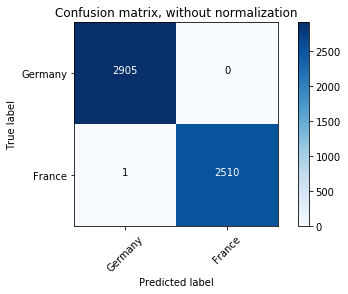

In [111]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred_dt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clas,
                      title='Confusion matrix, without normalization')


plt.show()

dt Confusion matrix, without normalization
[[2667  238]
 [ 262 2249]]


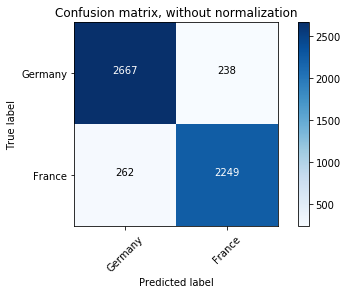

In [112]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clas,
                      title='Confusion matrix, without normalization')


plt.show()

dt Confusion matrix, without normalization
[[2884   21]
 [1322 1189]]


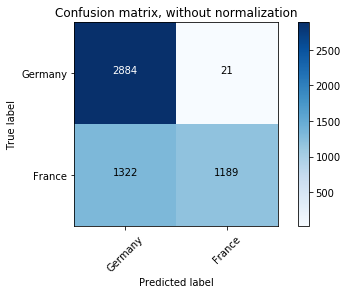

In [113]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_svm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clas,
                      title='Confusion matrix, without normalization')


plt.show()